In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib.patches as patches
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

In [5]:
def df_1a(P,Q,D):
    row = P + Q
    col = D
    X = np.empty((row,col))
    for i in range(row):
        for j in range(col):
            flip = random.randint(0,1)
            X[i][j] = flip
    y = np.zeros(row,dtype=int)
    y_bin = np.zeros(row,dtype=int)
    for i in range(row):
        for j in range(col):
            y[i] += X[i][j] * pow(2,col - j - 1)
        y_bin[i] = int(bin(y[i])[2:])
    target = np.zeros(row,dtype=int)
    mid = row//2
    target[:mid] = 0
    target[mid:]=1
    tsne = manifold.TSNE(n_components=2)
    #tsne = manifold.TSNE(n_components=2, init='pca', random_state=0,perplexity=50,verbose=1,n_iter=1500)
    X_tsne = tsne.fit_transform(X)
    df = pd.DataFrame({'Feature_1':X_tsne[:,0],'Feature_2':X_tsne[:,1],'Cluster': y_bin,'Target':target[:]})
    #display(df)
    return df

In [88]:
def plot_tsne_PQ(df,P,Q,D,string,m):
    mid = df.shape[0]//2
    fig = plt.figure(figsize=(5,4))
    ax = plt.subplot(111)
    colors=['b', 'c', 'y', 'm', 'r']
    markers = ['s','^','+','o']
    matrix,target = [0,1,10,11],[0,1]
    matrix_str = ['TT','TH','HT','HH']
    coins = ['P','Q']
    k = 0
    for i in matrix:
        size = (df['Cluster']==i).sum()
        ax.scatter(df[df['Cluster']==i]['Feature_1'],df[df['Cluster']==i]['Feature_2'], marker=markers[k],\
        color=colors[k],s=m*size, label='{}: total points {}'.format(matrix_str[k],size))
        k +=1
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2',fontsize=12)
    ax.legend(loc='center left',fontsize=12, bbox_to_anchor=(1, 0.5))
    ax.set_title('{} P={}, Q={}, D={}, t-SNE'.format(string,P,Q,D));
    plt.show()

In [89]:
def plot_tsne(df,P,Q,D,string,m):
    mid = df.shape[0]//2
    fig = plt.figure(figsize=(8,6))
    colors=['b', 'c', 'y', 'm', 'r']
    markers = ['s','^']
    ax = plt.subplot(111, projection='3d')
    matrix,target = [0,1,10,11],[0,1]
    matrix_str = ['TT','TH','HT','HH']
    coins = ['P','Q']
    k = 0
    for i in matrix:
        for j in target:
            size = ((df['Cluster']==i)&(df['Target']==j)).sum()
            ax.scatter(df[(df['Cluster']==i)&(df['Target']==j)]['Feature_1'],df[(df['Cluster']==i)&(df['Target']==j)]['Feature_2'],\
                       df[(df['Cluster']==i)&(df['Target']==j)]['Target'], marker = markers[j],color=colors[k], \
                       s = m*size,label='{}: {} total points {}'.format(matrix_str[k],coins[j],size))
        k +=1
    xx, yy = np.meshgrid(range(int(df['Feature_1'].min()-1),int(df['Feature_1'].max()+1)), range(int(df['Feature_2'].min()-1),\
                                                                                             int(df['Feature_2'].max()+1)))
    zz = pow(yy,0)
    ax.plot_surface(xx, yy, zz,alpha=0.1)
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2',fontsize=12)
    ax.set_zlabel('0:pennies, 1: quarters', fontsize=12, )
    plt.legend(loc='center left',fontsize=12, bbox_to_anchor=(1, 0.5))
    ax.set_title('{} P={}, Q={}, D={}, t-SNE (P is square, 0 in Z)'.format(string,P,Q,D));
    plot_tsne_PQ(df,P,Q,D,string,m)
   

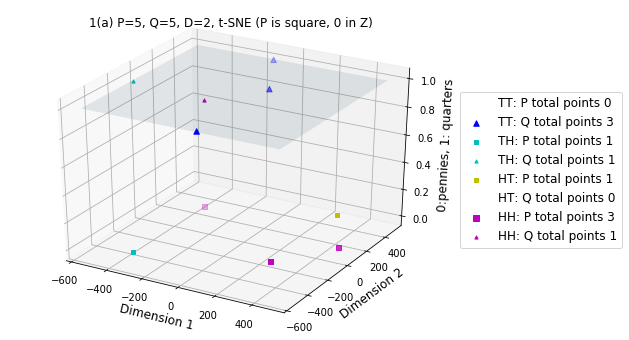

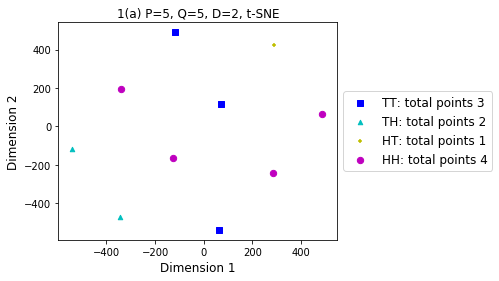

In [11]:
plot_tsne(df_1a(5,5,2),5,5,2,'1(a)',10)

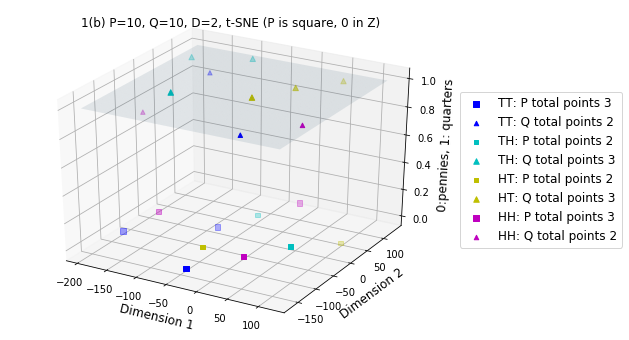

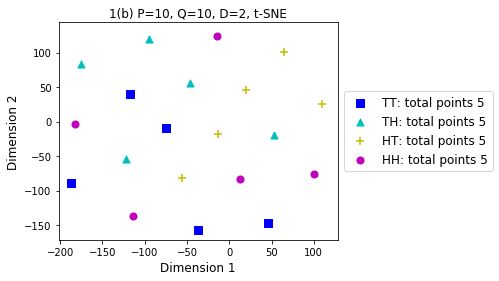

In [12]:
plot_tsne(df_1a(10,10,2),10,10,2,'1(b)',10)

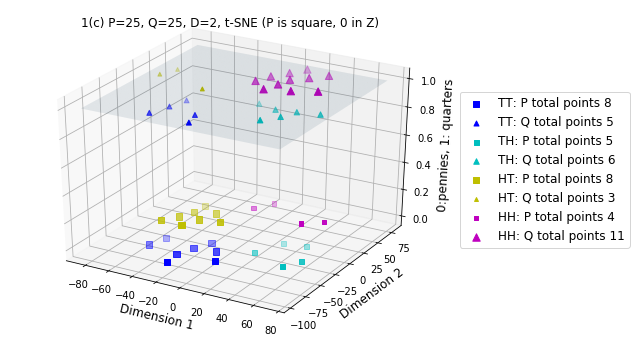

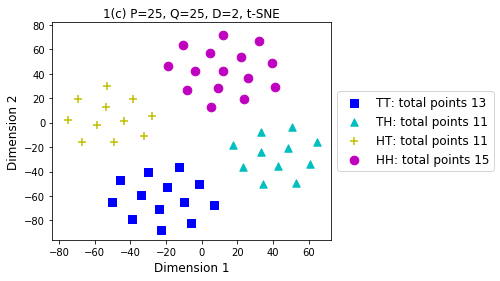

In [13]:
plot_tsne(df_1a(25,25,2),25,25,2,'1(c)',5)

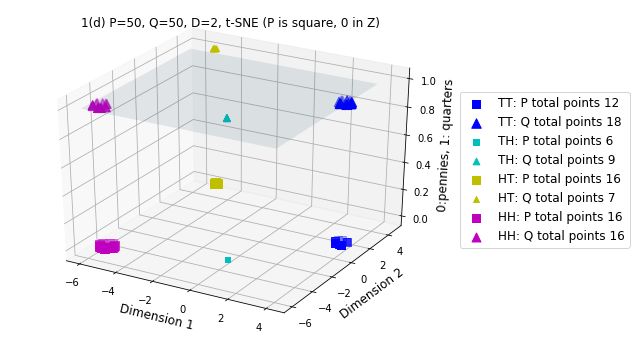

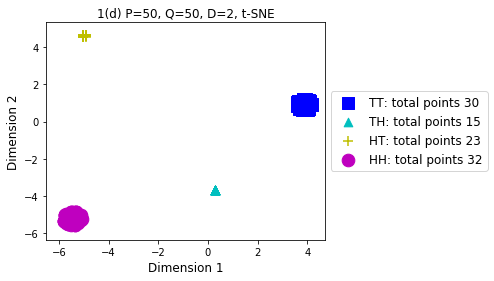

In [90]:
plot_tsne(df_1a(50,50,2),50,50,2,'1(d)',5)

In [33]:
def plot_tsne_PQ_2(df,P,Q,D,string,m):
    mid = df.shape[0]//2
    fig = plt.figure(figsize=(5,4))
    colors=['b', 'c', 'y', 'm', 'r','g','lime','k']
    markers = ['s','^','+','o','v','>','<','1']
    ax = plt.subplot(111)
    matrix,target = [0,1,10,11,100,101,110,111],[0,1]
    matrix_str = ['TTT','TTH','THT','THH','HTT','HTH','HHT','HHH']
    coins = ['P','Q']
    k = 0
    for i in matrix:
        size = (df['Cluster']==i).sum()
        ax.scatter(df[df['Cluster']==i]['Feature_1'],df[df['Cluster']==i]['Feature_2'], marker=markers[k],\
        color=colors[k],s=m*size, label='{}: total points {}'.format(matrix_str[k],size))
        k +=1
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2',fontsize=12)
    ax.legend(loc='center left',fontsize=12, bbox_to_anchor=(1, 0.5))
    ax.set_title('{} P={}, Q={}, D={}, t-SNE'.format(string,P,Q,D));
    plt.show()

In [34]:
def plot_tsne_2(df,P,Q,D,string,m):
    mid = df.shape[0]//2
    fig = plt.figure(figsize=(8,6))
    colors=['b', 'c', 'y', 'm', 'r','g','lime','k']
    markers = ['s','^']
    ax = plt.subplot(111, projection='3d')
    matrix,target = [0,1,10,11,100,101,110,111],[0,1]
    matrix_str = ['TTT','TTH','THT','THH','HTT','HTH','HHT','HHH']
    coins = ['P','Q']
    k = 0
    for i in matrix:
        for j in target:
            size = ((df['Cluster']==i)&(df['Target']==j)).sum()
            ax.scatter(df[(df['Cluster']==i)&(df['Target']==j)]['Feature_1'],df[(df['Cluster']==i)&(df['Target']==j)]['Feature_2'],df[(df['Cluster']==i)&(df['Target']==j)]['Target'], marker = markers[j],\
            color=colors[k],s = m*size,label='{}: {} total points {}'.format(matrix_str[k],coins[j],size))
        k +=1
    xx, yy = np.meshgrid(range(int(df['Feature_1'].min()-1),int(df['Feature_1'].max()+1)), range(int(df['Feature_2'].min()-1),\
                                                                                             int(df['Feature_2'].max()+1)))
    zz = pow(yy,0)
    ax.plot_surface(xx, yy, zz,alpha=0.1)
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2',fontsize=12)
    ax.set_zlabel('0:pennies, 1: quarters', fontsize=12, )
    plt.legend(loc='center left',fontsize=12, bbox_to_anchor=(1, 0.5))
    ax.set_title('{} P={}, Q={}, D={}, t-SNE (P is square,0 in Z)'.format(string,P,Q,D));
    plot_tsne_PQ_2(df,P,Q,D,string,m)

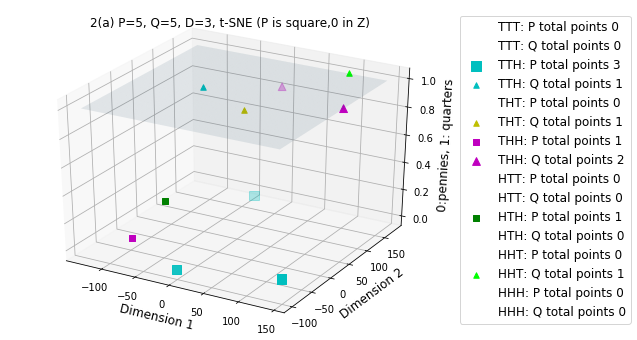

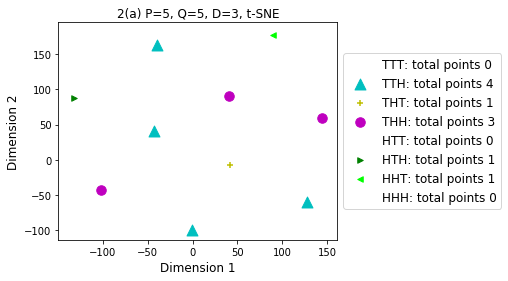

In [37]:
plot_tsne_2(df_1a(5,5,3),5,5,3,'2(a)',30)

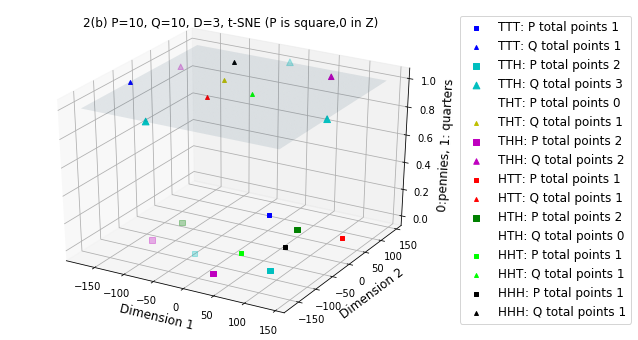

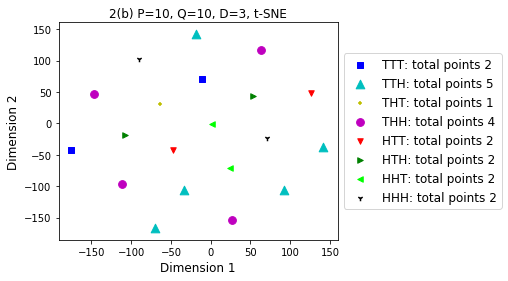

In [38]:
plot_tsne_2(df_1a(10,10,3),10,10,3,'2(b)',15)

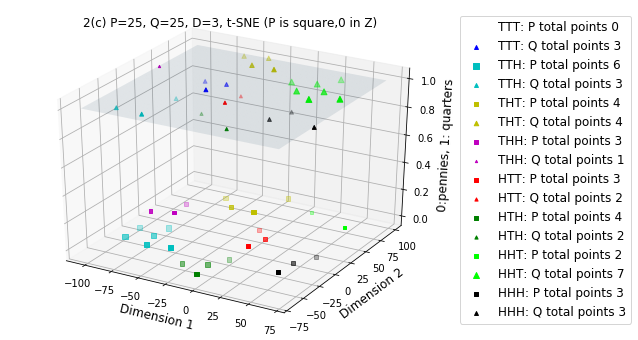

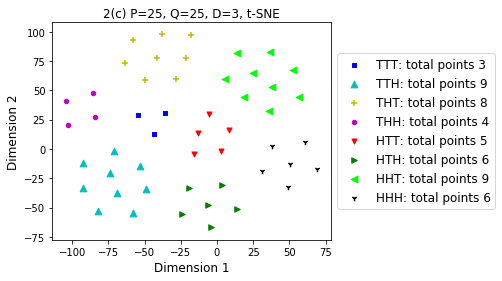

In [40]:
plot_tsne_2(df_1a(25,25,3),25,25,3,'2(c)',5)

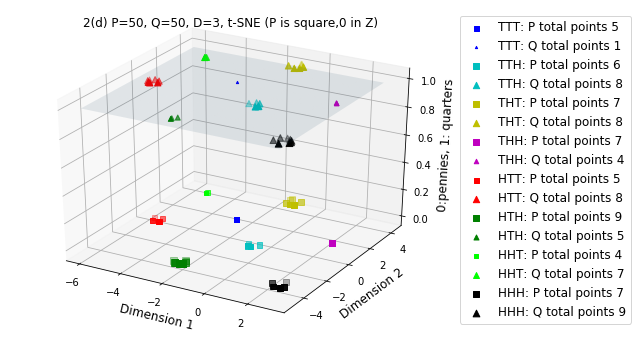

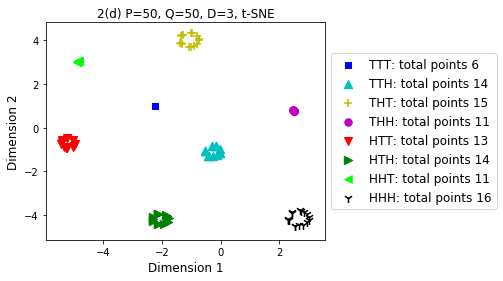

In [41]:
plot_tsne_2(df_1a(50,50,3),50,50,3,'2(d)',5)

In [99]:
def plot_tsne_PQ_3(df,P,Q,D,string,m):
    mid = df.shape[0]//2
    fig = plt.figure(figsize=(5,4))
    colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',\
            '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', \
            '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', \
            '#000000']
    markers = ['s','^','+','o','v','>','<','1','2','3','4','8','p','P','*','x','X','D'] #,'d','h','H'
    ax = plt.subplot(111)
    matrix,target = [0,1,10,11,100,101,110,111,1000,1001,1010,1011,1100,1101,1110,1111],[0,1]
    matrix_str = ['TTTT','TTTH','TTHT','TTHH','THTT','THTH','THHT','THHH','HTTT','HTTH','HTHT','HTHH','HHTT','HHTH','HHHT','HHHH']
    coins = ['P','Q']
    k = 0
    for i in matrix:
        size = (df['Cluster']==i).sum()
        ax.scatter(df[df['Cluster']==i]['Feature_1'],df[df['Cluster']==i]['Feature_2'], marker=markers[k],\
        color=colors[k],s=m*size, label='{}: total points {}'.format(matrix_str[k],size))
        k +=1
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2',fontsize=12)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=2,fontsize=12)
    ax.set_title('{} P={}, Q={}, D={}, t-SNE'.format(string,P,Q,D));
    plt.show()

In [100]:
def plot_tsne_3(df,P,Q,D,string,m):
    mid = df.shape[0]//2
    fig = plt.figure(figsize=(8,6))
    colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',\
            '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', \
            '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', \
            '#000000']
    markers = ['s','^']
    ax = plt.subplot(111, projection='3d')
    matrix,target = [0,1,10,11,100,101,110,111,1000,1001,1010,1011,1100,1101,1110,1111],[0,1]
    matrix_str = ['TTTT','TTTH','TTHT','TTHH','THTT','THTH','THHT','THHH','HTTT','HTTH','HTHT','HTHH','HHTT','HHTH','HHHT','HHHH']
    coins = ['P','Q']
    k = 0
    for i in matrix:
        for j in target:
            size = ((df['Cluster']==i)&(df['Target']==j)).sum()
            ax.scatter(df[(df['Cluster']==i)&(df['Target']==j)]['Feature_1'],df[(df['Cluster']==i)&(df['Target']==j)]['Feature_2'],\
                       df[(df['Cluster']==i)&(df['Target']==j)]['Target'], marker = markers[j],
            color=colors[k],s = m*size,label='{}: {} total points {}'.format(matrix_str[k],coins[j],size))
        k +=1
    xx, yy =  np.meshgrid(range(int(df['Feature_1'].min()-1),int(df['Feature_1'].max()+1)), range(int(df['Feature_2'].min()-1),\
                                                                                             int(df['Feature_2'].max()+1)))
    zz = pow(yy,0)
    ax.plot_surface(xx, yy, zz,alpha=0.1)
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2',fontsize=12)
    ax.set_zlabel('0:pennies, 1: quarters', fontsize=12, )
    #plt.legend(loc='center left',fontsize=12, bbox_to_anchor=(1, 0.5))
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=2, fontsize = 12)
    ax.set_title('{} P={}, Q={}, D={}, t-SNE (P is square,0 in Z)'.format(string,P,Q,D));
    plot_tsne_PQ_3(df,P,Q,D,string,m)

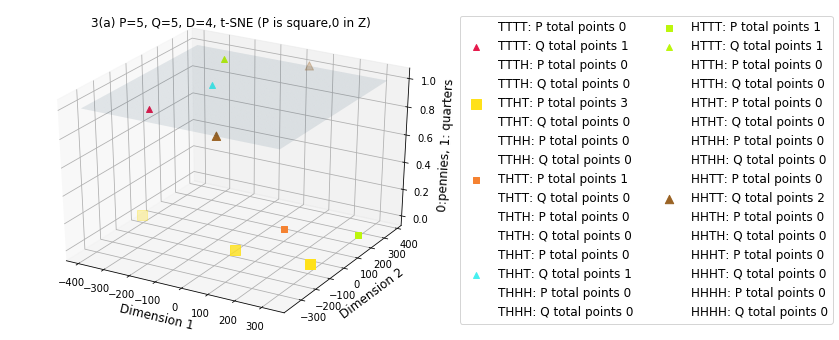

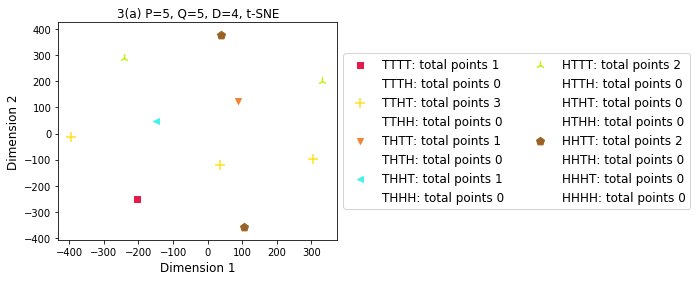

In [101]:
plot_tsne_3(df_1a(5,5,4),5,5,4,'3(a)',35) #per = 50

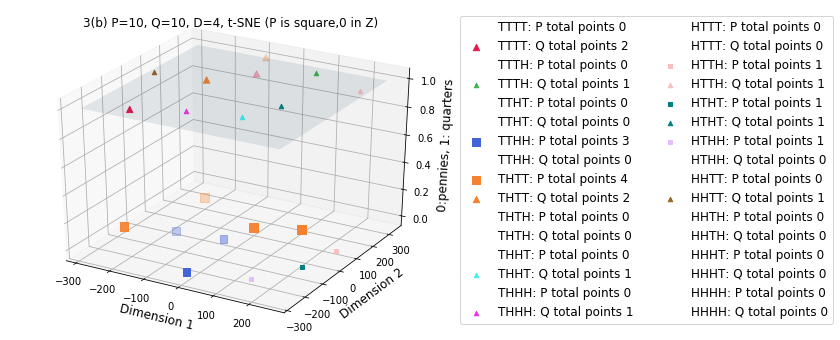

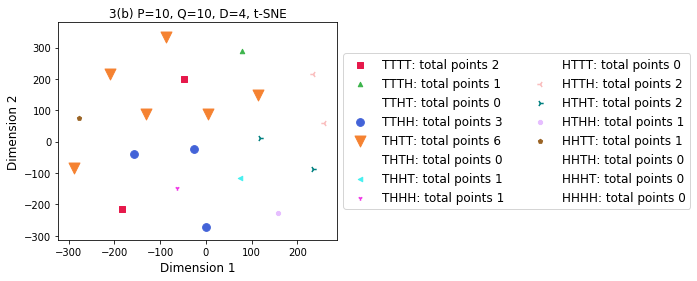

In [102]:
plot_tsne_3(df_1a(10,10,4),10,10,4,'3(b)',20) #per = 50

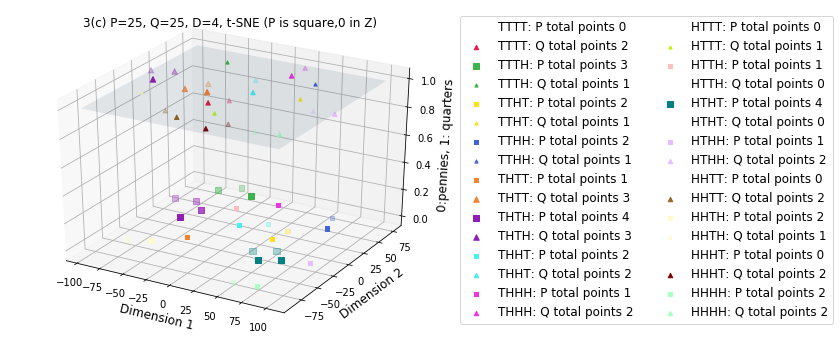

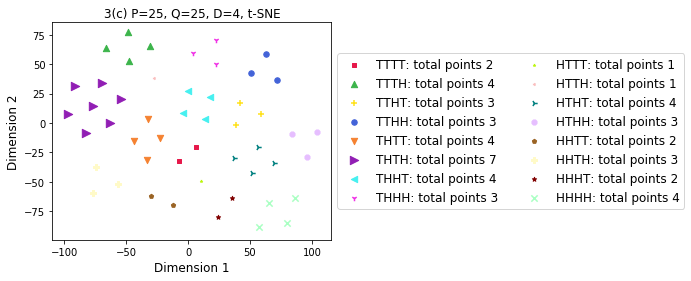

In [103]:
plot_tsne_3(df_1a(25,25,4),25,25,4,'3(c)',10)

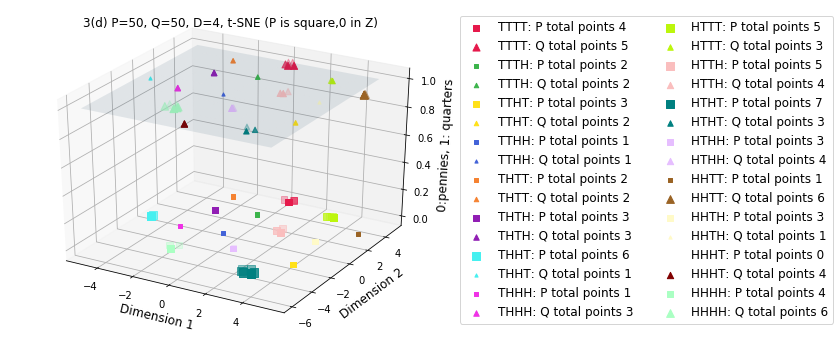

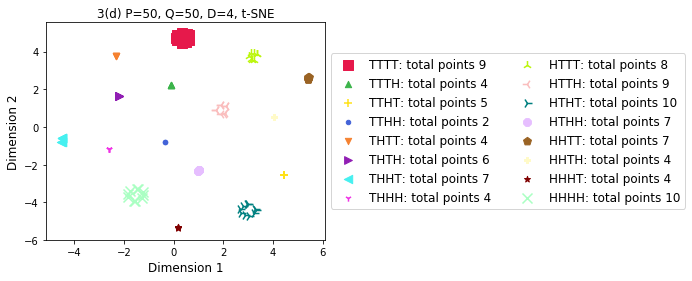

In [106]:
plot_tsne_3(df_1a(50,50,4),50,50,4,'3(d)',10)# perplexity = 25

In [97]:
def plot_tsne_PQ_4(df,P,Q,D,string,m):
    mid = df.shape[0]//2
    fig = plt.figure(figsize=(5,4))
    colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',\
            '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', \
            '#808000', '#ffd8b1', '#000075', '#808080', '#6495ED', '#000000','#008000','#00FF00',\
            '#FFFF00','#000080','#00FFFF','#0000FF','#FF0000','#FF00FF','#800080','#C0C0C0','#F0FFFF']
    markers = ['s','^','+','o','v','>','<','1','2','3','4','8','p','P','*','x','X','D'\
              ,'d','h','H','|',0,1,2,3,4,5,6,7,8,9,10,11]
    ax = plt.subplot(111)
    matrix,target = [0,1,10,11,100,101,110,111,1000,1001,1010,1011,1100,1101,1110,1111,10000,10001,10010,10011,10100,10101,10110,10111,11000,11001,11010,11011,11100,11101,11110,11111],[0,1]
    matrix_str = ['TTTTT','TTTTH','TTTHT','TTTHH','TTHTT','TTHTH','TTHHT','TTHHH','THTTT','THTTH','THTHT','THTHH','THHTT','THHTH','THHHT','THHHH',\
                 'HTTTT','HTTTH','HTTHT','HTTHH','HTHTT','HTHTH','HTHHT','HTHHH','HHTTT','HHTTH','HHTHT','HHTHH','HHHTT','HHHTH','HHHHT','HHHHH']
    coins = ['P','Q']
    k = 0
    for i in matrix:
        size = (df['Cluster']==i).sum()
        ax.scatter(df[df['Cluster']==i]['Feature_1'],df[df['Cluster']==i]['Feature_2'], marker=markers[k],\
        color=colors[k],s=m*size, label='{}: total points {}'.format(matrix_str[k],size))
        k +=1
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2',fontsize=12)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=2,fontsize=12)
    ax.set_title('{} P={}, Q={}, D={}, t-SNE'.format(string,P,Q,D));
    plt.show()

In [107]:
def plot_tsne_4(df,P,Q,D,string,m):
    mid = df.shape[0]//2
    fig = plt.figure(figsize=(8,6))
    colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',\
            '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', \
            '#808000', '#ffd8b1', '#000075', '#808080', '#6495ED', '#000000','#008000','#00FF00',\
            '#FFFF00','#000080','#00FFFF','#0000FF','#FF0000','#FF00FF','#800080','#C0C0C0','#F0FFFF']

    markers = ['s','^']
    ax = plt.subplot(111, projection='3d')
    matrix,target = [0,1,10,11,100,101,110,111,1000,1001,1010,1011,1100,1101,1110,1111,10000,10001,10010,10011,10100,10101,10110,10111,11000,11001,11010,11011,11100,11101,11110,11111],[0,1]
    matrix_str = ['TTTTT','TTTTH','TTTHT','TTTHH','TTHTT','TTHTH','TTHHT','TTHHH','THTTT','THTTH','THTHT','THTHH','THHTT','THHTH','THHHT','THHHH',\
                 'HTTTT','HTTTH','HTTHT','HTTHH','HTHTT','HTHTH','HTHHT','HTHHH','HHTTT','HHTTH','HHTHT','HHTHH','HHHTT','HHHTH','HHHHT','HHHHH']
    coins = ['P','Q']
    k = 0
    for i in matrix:
        for j in target:
            size = ((df['Cluster']==i)&(df['Target']==j)).sum()
            ax.scatter(df[(df['Cluster']==i)&(df['Target']==j)]['Feature_1'],df[(df['Cluster']==i)&(df['Target']==j)]['Feature_2'],\
                       df[(df['Cluster']==i)&(df['Target']==j)]['Target'], marker = markers[j],
            color=colors[k],s = m*size,label='{}: {} total points {}'.format(matrix_str[k],coins[j],size))
        k +=1
    xx, yy = np.meshgrid(range(int(df['Feature_1'].min()-1),int(df['Feature_1'].max()+1)), range(int(df['Feature_2'].min()-1),\
                                                                                             int(df['Feature_2'].max()+1)))
    zz = pow(yy,0)
    ax.plot_surface(xx, yy, zz,alpha=0.1)
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2',fontsize=12)
    ax.set_zlabel('0:pennies, 1: quarters', fontsize=12, )
    #plt.legend(loc='center left',fontsize=12, bbox_to_anchor=(1, 0.5))
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5),ncol=3, fontsize = 12)
    ax.set_title('{} P={}, Q={}, D={}, t-SNE (P is square,0 in Z)'.format(string,P,Q,D));
    plot_tsne_PQ_4(df,P,Q,D,string,m)

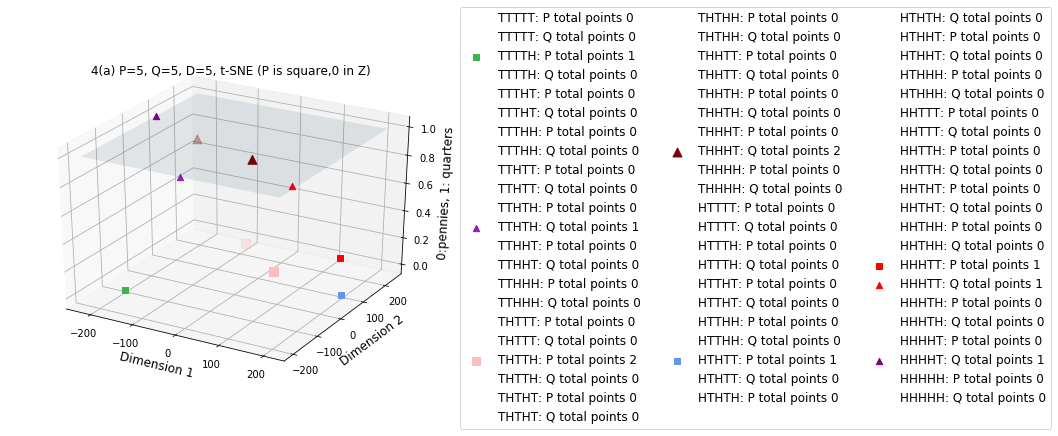

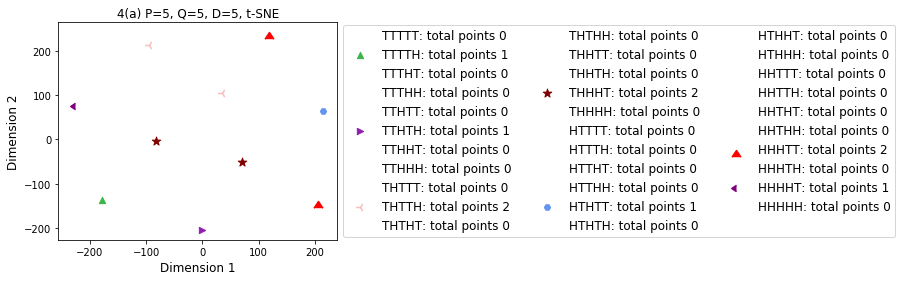

In [82]:
plot_tsne_4(df_1a(5,5,5),5,5,5,'4(a)',40)#

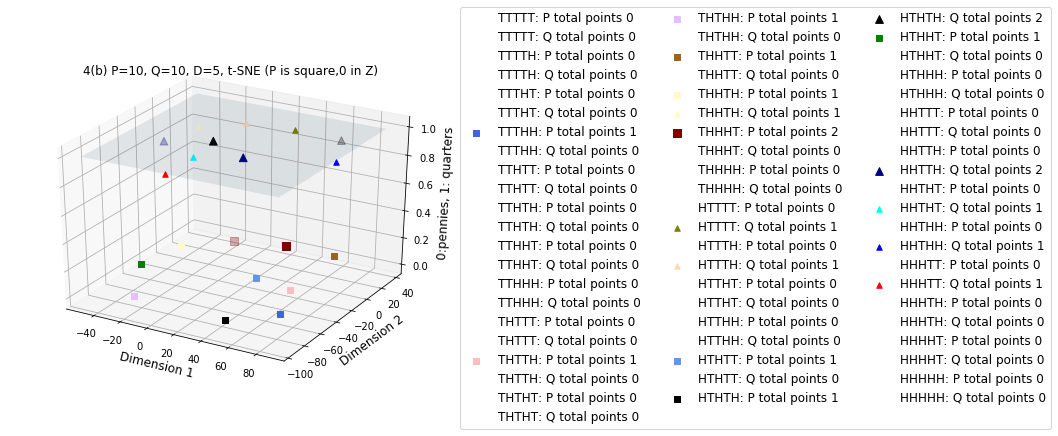

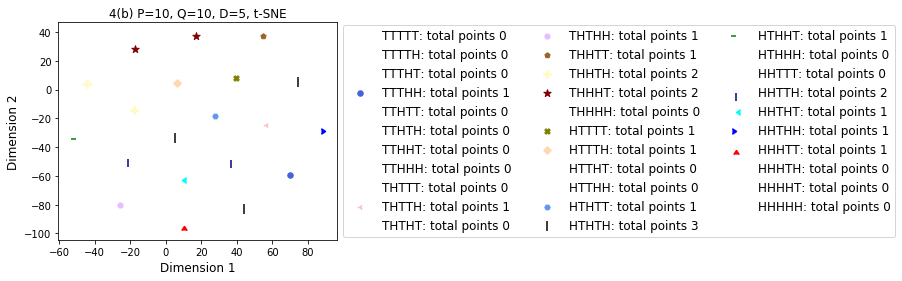

In [83]:
plot_tsne_4(df_1a(10,10,5),10,10,5,'4(b)',30)# 

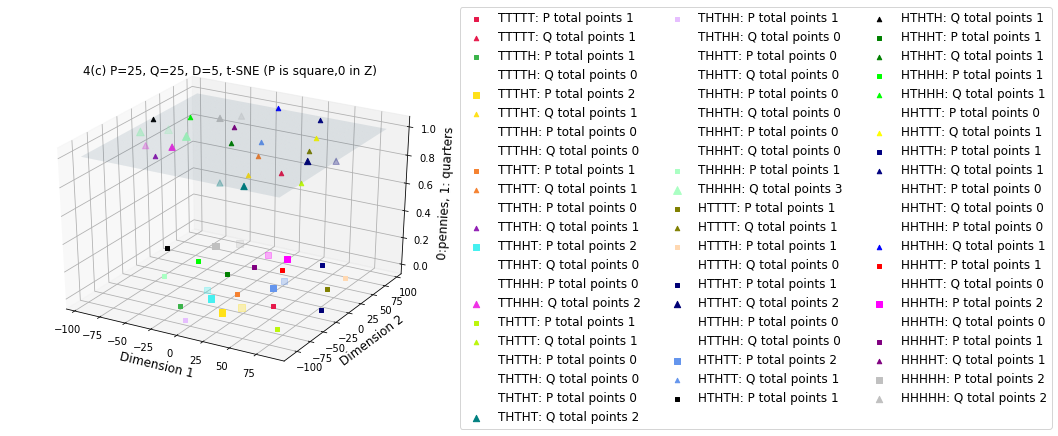

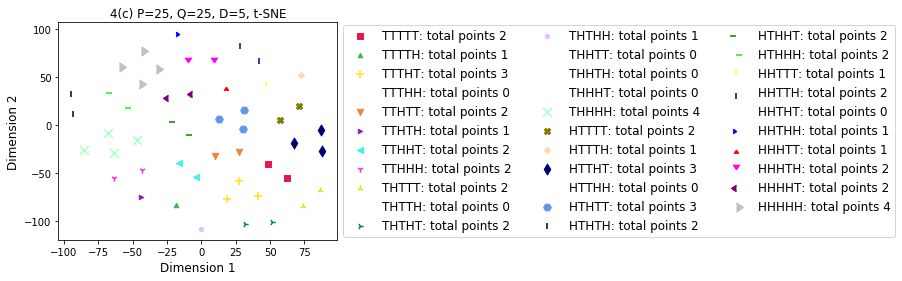

In [87]:
plot_tsne_4(df_1a(25,25,5),25,25,5,'4(c)',20)

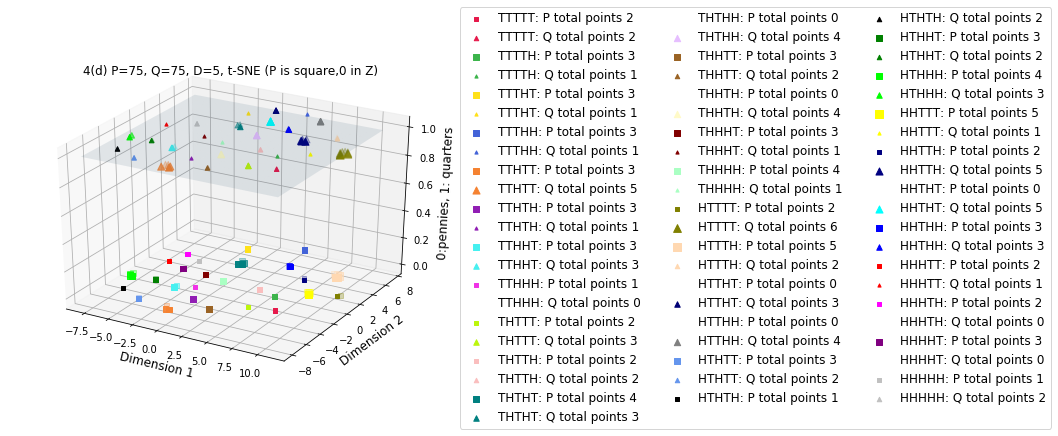

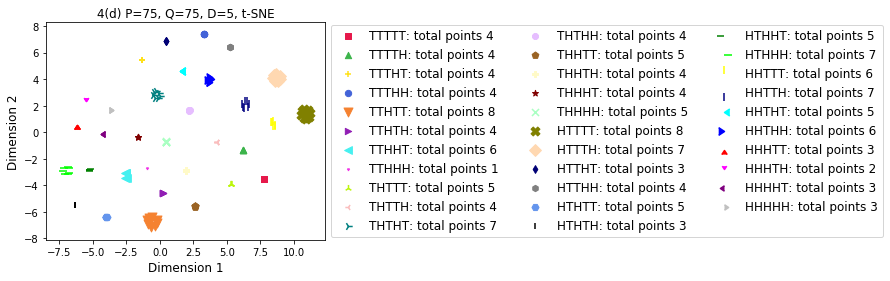

In [85]:
plot_tsne_4(df_1a(75,75,5),75,75,5,'4(d)',10)# perplexity = 25